# Data Collection, Pre-processing, Cleaning & Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
# Filter and ignore warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the raw data
data = pd.read_csv('food_data_v1.csv')

In [ ]:
data

,Unnamed: 0,id,food_id,food_name,food_description,ingredients,nutrition,created_time,data_source,cuisine,course,diet,state,region,veg_or_non_veg,allergies
0,0,231638,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...","['51.5', '0.0', '13.0', '0.0', '2.0', '0.0', '...",2023-06-15 20:49:14.141366,raw_recipes,NaN,NaN,NaN,NaN,NaN,veg,"['honey', 'milk', 'lactose', 'olive', 'squash'..."
1,1,231639,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...","['173.4', '18.0', '0.0', '17.0', '22.0', '35.0...",2023-06-15 20:49:14.147772,raw_recipes,NaN,NaN,NaN,NaN,NaN,non-veg,"['gluten', 'milk', 'lactose', 'poultry', 'dairy']"
2,2,231640,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...","['269.8', '22.0', '32.0', '48.0', '39.0', '27....",2023-06-15 20:49:14.148484,raw_recipes,NaN,NaN,NaN,NaN,NaN,non-veg,"['ltp', 'milk', 'lactose', 'nightshade', 'dairy']"
3,3,231641,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...","['368.1', '17.0', '10.0', '2.0', '14.0', '8.0'...",2023-06-15 20:49:14.149261,raw_recipes,NaN,NaN,NaN,NaN,NaN,veg,"['hypersensitivity', 'milk', 'lactose', 'olive..."
4,4,231642,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...","['352.9', '1.0', '337.0', '23.0', '3.0', '0.0'...",2023-06-15 20:49:14.150075,raw_recipes,NaN,NaN,NaN,NaN,NaN,veg,"['nightshade', 'oral', 'sugar']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238758,238758,761,700250,Til Pitha,NaN,"['Glutinous rice', 'black sesame seeds', 'gur']",[],2023-06-15 20:54:46.560110,ind_food101,NaN,dessert,vegetarian,Assam,North East,veg,[]
238759,238759,762,700251,Bebinca,NaN,"['Coconut milk', 'egg yolks', 'clarified butte...",[],2023-06-15 20:54:46.560371,ind_food101,NaN,dessert,vegetarian,Goa,West,veg,"['milk', 'lactose', 'nut', 'dairy']"
238760,238760,763,700252,Shufta,NaN,"['Cottage cheese', 'dry dates', 'dried rose pe...",[],2023-06-15 20:54:46.560632,ind_food101,NaN,dessert,vegetarian,Jammu & Kashmir,North,veg,"['milk', 'lactose', 'nut', 'dairy']"
238761,238761,764,700253,Mawa Bati,NaN,"['Milk powder', 'dry fruits', 'arrowroot powde...",[],2023-06-15 20:54:46.560894,ind_food101,NaN,dessert,vegetarian,Madhya Pradesh,Central,veg,"['milk', 'lactose', 'dairy']"


In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'food_id', 'food_name', 'food_description',
       'ingredients', 'nutrition', 'created_time', 'data_source', 'cuisine',
       'course', 'diet', 'state', 'region', 'veg_or_non_veg', 'allergies'],
      dtype='object')

In [ ]:
data = data.drop(['Unnamed: 0', 'id', 'created_time', 'data_source', 'cuisine',
       'course', 'diet', 'state','region'], axis=1)

In [ ]:
data

,food_id,food_name,food_description,ingredients,nutrition,veg_or_non_veg,allergies
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...","['51.5', '0.0', '13.0', '0.0', '2.0', '0.0', '...",veg,"['honey', 'milk', 'lactose', 'olive', 'squash'..."
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...","['173.4', '18.0', '0.0', '17.0', '22.0', '35.0...",non-veg,"['gluten', 'milk', 'lactose', 'poultry', 'dairy']"
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...","['269.8', '22.0', '32.0', '48.0', '39.0', '27....",non-veg,"['ltp', 'milk', 'lactose', 'nightshade', 'dairy']"
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...","['368.1', '17.0', '10.0', '2.0', '14.0', '8.0'...",veg,"['hypersensitivity', 'milk', 'lactose', 'olive..."
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...","['352.9', '1.0', '337.0', '23.0', '3.0', '0.0'...",veg,"['nightshade', 'oral', 'sugar']"
...,...,...,...,...,...,...,...
238758,700250,Til Pitha,NaN,"['Glutinous rice', 'black sesame seeds', 'gur']",[],veg,[]
238759,700251,Bebinca,NaN,"['Coconut milk', 'egg yolks', 'clarified butte...",[],veg,"['milk', 'lactose', 'nut', 'dairy']"
238760,700252,Shufta,NaN,"['Cottage cheese', 'dry dates', 'dried rose pe...",[],veg,"['milk', 'lactose', 'nut', 'dairy']"
238761,700253,Mawa Bati,NaN,"['Milk powder', 'dry fruits', 'arrowroot powde...",[],veg,"['milk', 'lactose', 'dairy']"


##### Convert the seasonal foods from the 'description' variable and store it in a new column 'seasonal_preference' and delete the 'description column

In [ ]:
import re

def detect_season(text):
    season_keywords = {
        "spring": ["spring", "bloom", "flowers", "warm", 'tomato', 'asparagus', 'peas', 'radishes', 'rhubarb', 'fava beans', 'artichokes', 'spinach', 'strawberries', 'mint', 'lamb', 'morel mushrooms', 'arugula', 'green onions', 'carrots', 'baby greens', 'chives', 'watercress', 'ramps', 'apricots', 'honey', 'bouillabaisse', 'fiddleheads', 'ramp pesto', 'morel risotto', 'lamb   mint jelly', 'pea and mint ', 'strawberry rhubarb ', 'artichoke dip', 'spinach and feta ', 'spring vegetable stirfry', 'radish ', 'asparagus quiche', 'baby arugula ', 'carrot ginger ', 'mint chocolate chip ', 'watercress and orange ', ' lamb ', 'fava bean crostini', 'rhubarb crumble', 'apricot chicken', 'spring roll', 'pea risotto', ' artichokes', 'mint julep', 'chive biscuits', 'strawberry short', 'honey ham', 'minted pea purÃ©e', 'carrot ', 'spring green ', 'watercress ', 'spinach and ricotta  shells', 'strawberry spinach ', 'mintinfused lemonade', ' asparagus  lemon', 'green onion pans', 'baby carrot and dill dip', 'honey mustard  salmon', 'mint chocolate brownies', 'radish and cucumber ', 'pea shoot pesto', ' lamb burgers', 'spring onion tart', 'carrot  cups', 'spinach and mushroom quiche', 'rhubarb compote', 'apricot pork tenderloin', 'honey  vegetables', 'mint chip milkshake', 'watercress and avocado ', 'lamb tagine  apricots', 'green pea ', 'artichoke and spinach dip', 'radish and herb butter sandwiches', 'rhubarb crumb bars', 'minty cucumber ', ' asparagus  balsamic reduction', 'honey garlic chicken ', 'minted pea hummus', 'carrot ginger dressing', 'strawberry cheese', 'spinach and strawberry ', 'minty mojito', 'fava bean and prosciutto crostini', ' artichoke  lemon aioli', 'baby spinach and quinoa ', 'radish and watercress sandwiches', 'apricot salmon', 'honey walnut shrimp', 'minted pea and feta pasta', 'asparagus', 'peas', 'radishes', 'rhubarb', 'fava beans', 'artichokes', 'spinach', 'strawberries', 'mint', 'lamb', 'morel mushrooms', 'arugula', 'green onions', 'carrots', 'baby greens', 'chives', 'watercress', 'ramps', 'apricots', 'honey', 'bouillabaisse', 'fiddleheads', 'ramp pesto', 'morel risotto', 'lamb   mint jelly', 'pea and mint ', 'strawberry rhubarb ', 'artichoke dip', 'spinach and feta ', 'spring vegetable stirfry', 'radish ', 'asparagus quiche', 'baby arugula ', 'carrot ginger ', 'mint chocolate chip ', 'watercress and orange ', ' lamb ', 'fava bean crostini', 'rhubarb crumble', 'apricot chicken', 'caprese ', ' corn on the cob', 'watermelon feta ', 'blueberry pans', 'zucchini noodles  pesto', 'peach cobbler', 'basil pesto pasta', 'cucumber gazpacho', 'bell pepper   quinoa', 'barbecue', 'mango ', 'green bean almondine', 'berry smoothie', 'avocado toast', 'nectarine tart', 'pineapple fried rice', 'pesto  shrimp', 'plums and prosciutto', 'cherry ', ' summer vegetables', 'pumpkin spice latte', 'apple ', 'pear and goat cheese ', 'butternut squash ', 'cinnamon ', 'cranberry walnut bread', ' brussels sprouts', 'sweet potato casserole', 'persimmon pudding', 'sage and mushroom stuffing', 'chestnut ', 'maple bacon', 'pomegranate ', 'acorn squash  brown sugar', 'caramel apple dip', 'quince tart', 'hazelnut chocolate truffles', 'fig and goat cheese crostini', 'pecan pralines', 'butternut squash ravioli', 'asparagus', 'peas', 'radishes', 'rhubarb', 'fava beans', 'artichokes', 'spinach', 'strawberries', 'mint', 'lamb', 'morel mushrooms', 'arugula', 'green onions', 'carrots', 'baby greens', 'chives', 'watercress', 'ramps', 'apricots', 'honey', 'bouillabaisse', 'fiddleheads', 'ramp pesto', 'morel risotto', 'lamb   mint jelly', 'pea and mint ', 'strawberry rhubarb ', 'artichoke dip', 'spinach and feta ', 'spring vegetable stirfry', 'radish ', 'asparagus quiche', 'baby arugula ', 'carrot ginger ', 'mint chocolate chip ', 'watercress and orange ', ' lamb ', 'fava bean crostini', 'rhubarb crumble', 'apricot chicken', 'citrus fruits', 'eggs benedict  asparagus', 'lemon bars', 'pea risotto', 'spinach and strawberry ', 'mint julep', 'spring ', 'carrot ', 'cucumber sandwiches', 'honey ham', 'lavender shortbread ', 'green pea ', ' artichokes', 'mintinfused', 'wild mushroom omelette', 'rhubarb compote', ' asparagus  lemon', 'minty mojito', 'spring onion quiche', 'chilled strawberry ', 'creamed spinach', 'fresh mint ', 'radicchio   citrus vinaigrette', 'honey carrots', 'pistachio crusted lamb', 'ramp butter strawberries', 'asparagus', 'spinach', 'peas', 'rhubarb', 'arugula', 'fava beans', 'mint', 'lemon tart', 'spring vegetable stirfry', ' artichokes', 'fennel and orange ', 'spring pea ', 'strawberry short', 'spring vegetable risotto', 'cucumber and dill ', 'honey  carrots', 'lemon poppy seed ', 'radishes  butter and sea salt', 'apricot chicken', 'lemon ricotta pans', 'lavenderinfused lemonade', 'minted pea ', ' salmon  lemon and herbs', 'spring vegetable frittata', 'lemon garlic  chicken', 'spring greens   strawberries and goat cheese', 'carrot ginger ', 'pea and mint pesto pasta', 'spinach and feta  chicken', 'lemon thyme  potatoes', 'spring vegetable quiche', 'herbcrusted rack of lamb', 'lemon blueberry scones', ' asparagus  parmesan', 'spring onion and potato gratin', 'strawberry spinach ', 'mint chocolate chip ', 'lemon herb  salmon', 'spring vegetable curry', ' lemon herb chicken', 'asparagus and goat cheese tart', 'pea and mint risotto', 'strawberry rhubarb ', 'lemon lavender cupsstrawberries', 'asparagus', 'spinach', 'peas', 'rhubarb', 'arugula', 'fava beans', 'mint', 'lemon tart', 'spring vegetable stirfry', ' artichokes', 'fennel and orange ', 'spring pea ', 'strawberry short', 'spring vegetable risotto', 'cucumber and dill ', 'honey  carrots', 'lemon poppy seed ', 'radishes  butter and sea salt', 'apricot chicken', 'lemon ricotta pans', 'lavenderinfused lemonade', 'minted pea ', ' salmon  lemon and herbs', 'spring vegetable frittata', 'slemon garlic  chicken', 'spring greens   strawberries and goat cheese', 'carrot ginger ', 'pea and mint pesto pasta', 'spinach and feta  chicken', 'lemon thyme  potatoes', 'spring vegetable quiche', 'herbcrusted rack of lamb', 'lemon blueberry scones', 'asparagus  parmesan', 'spring onion and potato gratin', 'strawberry spinach ', 'mint chocolate chip ', 'lemon herb  salmon', 'spring vegetable curry', ' lemon herb chicken', 'asparagus and goat cheese tart', 'pea and mint risotto', 'strawberry rhubarb ', 'lemon lavender cups', 'watercress', 'lamb   mint sauce', 'radish and cucumber ', 'lemon chicken piccata', 'spring roll bowls', 'lemon garlic shrimp', 'herbed goat cheese crostini', 'lemon raspberry ', 'green pea and bacon ', 'lemon meringue ', 'dill and cucumber ', 'spring vegetable pasta primavera', 'mint chocolate chip milkshake', 'lemon thyme chicken ', 'asparagus and gruyere tart', 'spring vegetable couscous', 'lemon blueberry ', 'mixed berry ', ' lemon pepper shrimp', 'garlic and herb potatoes', 'carrot   cream cheese frosting', 'lemon herb quinoa ', 'strawberry mango ', 'lemon chicken and rice ', ' vegetable ', 'lemon ricotta crepes', 'honey mustard  salmon', 'spring vegetable galette', 'strawberry spinach smoothie', 'lemon chicken orzo ', 'spinach and goat cheese  mushrooms', 'lemon ginger ', 'radish and avocado toast', 'lemon raspberry bars', 'garlic  asparagus', 'strawberry rhubarb crisp', 'lemon chicken   tzatziki sauce', 'mint chocolate chip ', 'strawberry arugula ', 'lemon blueberry pans', 'asparagus and mushroom frittata', 'lemon herb  vegetables', 'spring vegetable coconut curry', 'lemon ginger detox', ' bell peppers  quinoa and vegetables', 'lemon bars', 'lavender lemonade', 'beet and goat cheese ', 'garlic butter shrimp', 'spring vegetable couscous ', 'lemon herb  chicken', 'strawberry spinach   feta and almonds', 'lemon garlic butter salmon', 'spring vegetable carbonara', 'honey lemon chicken', 'radish and cucumber ', 'lemon ricotta pans  blueberry sauce', 'mint chocolate  sandwiches', 'spring vegetable enchiladas', 'lemon ginger chicken stirfry', ' zucchini boats', 'cauliflower  lemon tahini sauce', 'strawberry balsamic  chicken', 'lemon lavender shortbread ', 'spring vegetable orzo ', 'mint julep', 'lemon thyme sugar ', 'garlic butter  mushrooms', 'strawberry basil lemonade', 'lemon garlic butter shrimp pasta', 'spinach strawberry   balsamic vinaigrette', 'lemon herb butter  turkey', 'spring vegetable tart', 'garlic and lemon hummus', 'honey lemon ginger ',],
        "summer": ["summer", "hot", "sun", "beach", 'tomato', 'corn', 'watermelon', 'blueberries', 'zucchini', 'peaches', 'basil', 'cucumbers', 'bell peppers', 'meats', 'mangoes', 'green beans', 'berries', 'avocado', 'nectarines', 'pineapple', 'pesto', 'plums', 'cherries', 'barbecue', 'caprese', 'corn on the cob', 'watermelon feta', 'blueberry pans', 'zucchini noodles pesto', 'peach cobbler', 'basil pesto pasta', 'cucumber gazpacho', 'bell pepper quinoa', 'barbecue', 'mango', 'green bean almondine', 'berry smoothie', 'avocado toast', 'nectarine tart', 'pineapple fried rice', 'pesto shrimp', 'plums and prosciutto', 'cherry', 'summer vegetables', 'tomato mozzarella', 'cornbread', 'watermelon sorbet', 'blueberry', 'zucchini boats', 'peach and raspberry', 'basil lemonade', 'cucumber', 'bell peppers', 'chicken', 'mango coconut', 'green bean', 'mixed berry', 'avocado', 'nectarine and goat cheese crostini', 'pineapple', 'barbecue chicken wings', 'caprese', 'corn on the cob chili lime butter', 'watermelon feta and mint', 'blueberry smoothie bowl', 'zucchini fritters', 'peach and burrata', 'basil limeade', 'cucumber and tomato', 'bell peppers quinoa and feta', 'mango and shrimp', 'green bean casserole', 'berry cheese', 'avocado and black bean', 'nectarine and prosciutto', 'pineapple coconut smoothie', 'pesto pasta', 'plum tart', 'cherry chocolate chip', 'barbecue chicken wings', 'tomato and mozzarella bruschetta', 'corn chili lime seasoning', 'watermelon gazpacho', 'blueberry lemonade', 'zucchini bread', 'peach and goat cheese pizza', 'basil chicken stirfry', 'cucumber and dill', 'bell peppers ground beef and rice', 'mango and avocado', 'green bean and potato', 'berry tart', 'watermelon', 'corn', 'barbecue', 'lemonade', 'popsicles', 'gazpacho', 'kabobs', 'lobster', 's\'mores', 'caprese', 'peach cobbler', 'tomatoes', 'zucchini', 'pineapple', 'mango', 'blueberries', 'strawberries', 'chicken', 'peppers', 'potato', 'cole', 'sk', 'shrimp cocktail', 'sangria', 'mojitos', 'ceviche', 'fish tacos', 'pesto pasta', 'caesar', 'vegetables', 'bruschetta', 'ratatouille', 'clam bake', 'crab s', 'fish', 'tuna', 'beef', 'fruit', 'smoothies', 'lemon sorbet', 'iced', 'fajitas', 'quesadillas', 'tzatziki', 'hummus', 'baba ganoush', 'falafel', 'greek', 'cucumber', 'gazpacho', 'vichyssoise', 'potato', 'cream of tomato', 'minestrone', 'gumbo', 'jambalaya', 'fried chicken', 'potato chips', 'french fries', 'onion rings', 'fried calamari', 'fried shrimp', 'fried fish', 'hushpups', 'okra', 'collard greens', 'cornbread', 'pulled pork', 'ribs', 'brisket', 'hamburger', 'dog', 'cheese sandwich', 'blt sandwich', 'tuna sandwich', 'egg sandwich', 'chicken sandwich', 'peanut butter and jelly sandwich', 'macaroni and cheese', 'lasagna', 'pizza', 'sushi', 'fried rice', 'pad thai', 'curry', 'tandoori chicken', 'naan bread', 'samosas', 'spring', 'tacos', 'burritos', 'enchiladas', 'queso dip', 'guacamole', 'chips and', 'margaritas', 'tequila sunrise', 'pia colada', 'agua fresca', 'pineapple', 'ceviche tostadas', 'mango', 'coconut shrimp', 'pineapple fried rice', 'fish ceviche', 'chicken fajitas', 'shrimp quesadillas', 'cucumber mint lemonade', 'watermelon', 'strawberry lemonade', 'shrimp', 'sk tacos', 'chicken enchiladas', 'fish burritos', 'vegetable fajitas', 'corn on the cob', 'cucumber gazpacho', 'agua de jamaica', 'fruit sorbet', 'mango margarita', 'tequila ss', 'fish ceviche tostadas', 'beef tacos', 'shrimp cocktail', 'guacamole and chips', 'verde', 'elote (mexican street corn)', 'chicken quesadillas', 'pineapple', 'fish tacos chipotle mayo', 'sk fajitas', 'nachos', 'frozen margaritas', 'shrimp ceviche tostadas', 'chicken tacos', 'shrimp fajitas', 'beef burritos', 'corn', 'frozen daiquiris', 'chicken tostadas', 'ceviche cocktail', 'guava agua fresca', 'pineapple coconut smoothie', 'strawberry mango margarita', 'shrimp ceviche cocktail', 'fish tacos mango', 'vegetable quesadillas', 'street- elote', 'chicken tinga tacos', 'beef fajitas', 'shrimp burritos', 'roja'],
       "autumn": ['autumn', 'fall', 'leaves', 'cold', 'harvest', 'rainy', 'pumpkin', 'apples', 'pears', 'butternut squash', 'cinnamon', 'cranberries', 'brussels sprouts', 'sweet potatoes', 'persimmons', 'sage', 'chestnuts', 'maple syrup', 'pomegranates', 'acorn squash', 'caramel', 'quince', 'hazelnuts', 'fig', 'pecans', 'pumpkin spice latte', 'apple', 'pear and goat cheese', 'butternut squash', 'cinnamon', 'cranberry walnut bread', 'brussels sprouts', 'sweet potato casserole', 'persimmon pudding', 'sage and mushroom stuffing', 'chestnut', 'maple bacon', 'pomegranate', 'acorn squash brown sugar', 'caramel apple dip', 'quince tart', 'hazelnut chocolate truffles', 'fig and goat cheese crostini', 'pecan pralines', 'butternut squash ravioli', 'pumpkin bread', 'apple crisp', 'pear and pecan', 'maple carrots', 'cranberry turkey', 'chestnut hummus', 'sweet potato gnocchi', 'cinnamon apple', 'cranberry brie bites', 'brussels sprouts gratin', 'pumpkin cheese', 'maple ham', 'fig jam', 'pecan', 'pumpkin curry', 'apple cider doughnuts', 'pear and blue cheese pizza', 'butternut squash risotto', 'caramel pecan', 'nutmeg', 'cloves', 'ginger', 'green beans', 'stuffing', 'turkey', 'gravy', 'cornbread stuffing', 'mashed potatoes', 'baked apples', 'carrots', 'waldorf', 'chocolate', 'pumpkin', 'beef', 'chicken and dumplings', 'chili', 'corn chowder', 'cranberry relish', 'cornbread', 'pumpkin seeds', 'chestnuts', 'sausage stuffing', "shepherd's", 'turkey sandwich', 'apple butter', 'pecan bars', 'sweet potato', 'root vegetables', 'beef brisket', 'corn', 'pumpkin pans', 'apple turnovers', 'pear tart', 'pear and cheese', 'pumpkin seeds', 'sauteed kale', 'garlic mashed potatoes', 'beets', 'green bean casserole', 'creamed corn', 'cranberry bread', 'pumpkin hummus', 'butternut squash lasagna', 'mushroom', 'ratatouille', 'apple cider vinegar', 'baked brie cranberries', 'pork apples', 'cranberry margarita', 'pumpkin ale', 'apple brandy', 'butternut squash gratin', 'maple ham', 'chicken pot', 'pumpkin ravioli', 'spiced apple cider', 'butternut squash curry', 'pumpkin chocolate chip', 'cranberry', 'apple strudel', 'apple cider sangria', 'butternut squash sage', 'beef and barley', 'pumpkin puree', 'pumpkin fritters', 'cranberry walnut bread', 'pumpkin and feta', 'squash and apple', 'maple salmon', 'cinnamon sweet potatoes', 'apple and brie cheese','butternut squash and spinach lasagna', 'pumpkin and goat cheese risotto'],
        "winter": ["winter", "snow", "christmas", "cold", "freeze", 'roast turkey', 'cranberry sauce', 'eggnog', 'gingerbread', ' chocolate', 'citrus', 'chestnuts', 'sugar ', 'peppermint', 'cinnamon', 'pomegranates', 'butternut squash', 'maple syrup', ' apple cider', 'beef ', 'mashed potatoes', 'stuffing']
    }

    cleaned_text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    tokenized_text = cleaned_text.lower().split()  # Tokenize the text

    found_seasons = []
    for season, keywords in season_keywords.items():
        for keyword in keywords:
            if keyword in tokenized_text:
                found_seasons.append(season)
                break

    return ", ".join(found_seasons) if found_seasons else "none"

# Convert the 'description' column to string type
data['food_description'] = data['food_description'].astype(str)

# Apply the function to the 'description' column in the dataset
data['seasonal_preference'] = data['food_description'].apply(detect_season)

In [ ]:
data

,food_id,food_name,food_description,ingredients,nutrition,veg_or_non_veg,allergies,seasonal_preference
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...","['51.5', '0.0', '13.0', '0.0', '2.0', '0.0', '...",veg,"['honey', 'milk', 'lactose', 'olive', 'squash'...",autumn
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...","['173.4', '18.0', '0.0', '17.0', '22.0', '35.0...",non-veg,"['gluten', 'milk', 'lactose', 'poultry', 'dairy']",none
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...","['269.8', '22.0', '32.0', '48.0', '39.0', '27....",non-veg,"['ltp', 'milk', 'lactose', 'nightshade', 'dairy']","autumn, winter"
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...","['368.1', '17.0', '10.0', '2.0', '14.0', '8.0'...",veg,"['hypersensitivity', 'milk', 'lactose', 'olive...",none
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...","['352.9', '1.0', '337.0', '23.0', '3.0', '0.0'...",veg,"['nightshade', 'oral', 'sugar']",none
...,...,...,...,...,...,...,...,...
238758,700250,Til Pitha,nan,"['Glutinous rice', 'black sesame seeds', 'gur']",[],veg,[],none
238759,700251,Bebinca,nan,"['Coconut milk', 'egg yolks', 'clarified butte...",[],veg,"['milk', 'lactose', 'nut', 'dairy']",none
238760,700252,Shufta,nan,"['Cottage cheese', 'dry dates', 'dried rose pe...",[],veg,"['milk', 'lactose', 'nut', 'dairy']",none
238761,700253,Mawa Bati,nan,"['Milk powder', 'dry fruits', 'arrowroot powde...",[],veg,"['milk', 'lactose', 'dairy']",none


In [ ]:
data['seasonal_preference'].value_counts()

none                              141766
summer                             39775
autumn                             14314
summer, autumn                     10879
spring, summer                      7146
spring                              5226
autumn, winter                      4459
winter                              4444
summer, autumn, winter              2999
spring, summer, autumn              2649
spring, autumn                      1597
summer, winter                      1293
spring, summer, autumn, winter       865
spring, autumn, winter               779
spring, summer, winter               292
spring, winter                       280
Name: seasonal_preference, dtype: int64

##### Convert the 'ingredients' variable to a 'ingredients' string variable, which will contain the list of all ingredients

In [ ]:
import ast

# Convert string representation of list to actual list, then join with comma
data['ingredients'] = data['ingredients'].apply(lambda x: ', '.join(ast.literal_eval(x)))

# Print the data
data

,food_id,food_name,food_description,ingredients,nutrition,veg_or_non_veg,allergies,seasonal_preference
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"winter squash, mexican seasoning, mixed spice,...","['51.5', '0.0', '13.0', '0.0', '2.0', '0.0', '...",veg,"['honey', 'milk', 'lactose', 'olive', 'squash'...",autumn
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"prepared pizza crust, sausage patty, eggs, mil...","['173.4', '18.0', '0.0', '17.0', '22.0', '35.0...",non-veg,"['gluten', 'milk', 'lactose', 'poultry', 'dairy']",none
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"ground beef, yellow onions, diced tomatoes, to...","['269.8', '22.0', '32.0', '48.0', '39.0', '27....",non-veg,"['ltp', 'milk', 'lactose', 'nightshade', 'dairy']","autumn, winter"
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","spreadable cheese with garlic and herbs, new p...","['368.1', '17.0', '10.0', '2.0', '14.0', '8.0'...",veg,"['hypersensitivity', 'milk', 'lactose', 'olive...",none
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"tomato juice, apple cider vinegar, sugar, salt...","['352.9', '1.0', '337.0', '23.0', '3.0', '0.0'...",veg,"['nightshade', 'oral', 'sugar']",none
...,...,...,...,...,...,...,...,...
238758,700250,Til Pitha,nan,"Glutinous rice, black sesame seeds, gur",[],veg,[],none
238759,700251,Bebinca,nan,"Coconut milk, egg yolks, clarified butter, all...",[],veg,"['milk', 'lactose', 'nut', 'dairy']",none
238760,700252,Shufta,nan,"Cottage cheese, dry dates, dried rose petals, ...",[],veg,"['milk', 'lactose', 'nut', 'dairy']",none
238761,700253,Mawa Bati,nan,"Milk powder, dry fruits, arrowroot powder, all...",[],veg,"['milk', 'lactose', 'dairy']",none


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download nltk's wordnet and punkt packages
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

# define the lemmatizer
lemmatizer = WordNetLemmatizer()

# define a function to lemmatize a sentence
def lemmatize_text(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

# apply lemmatization to the 'ingredients' column
data['ingredients'] = data['ingredients'].apply(lemmatize_text)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\priab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data

,food_id,food_name,food_description,ingredients,nutrition,veg_or_non_veg,allergies,seasonal_preference
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"winter squash , mexican seasoning , mixed spic...","['51.5', '0.0', '13.0', '0.0', '2.0', '0.0', '...",veg,"['honey', 'milk', 'lactose', 'olive', 'squash'...",autumn
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"prepared pizza crust , sausage patty , egg , m...","['173.4', '18.0', '0.0', '17.0', '22.0', '35.0...",non-veg,"['gluten', 'milk', 'lactose', 'poultry', 'dairy']",none
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"ground beef , yellow onion , diced tomato , to...","['269.8', '22.0', '32.0', '48.0', '39.0', '27....",non-veg,"['ltp', 'milk', 'lactose', 'nightshade', 'dairy']","autumn, winter"
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","spreadable cheese with garlic and herb , new p...","['368.1', '17.0', '10.0', '2.0', '14.0', '8.0'...",veg,"['hypersensitivity', 'milk', 'lactose', 'olive...",none
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"tomato juice , apple cider vinegar , sugar , s...","['352.9', '1.0', '337.0', '23.0', '3.0', '0.0'...",veg,"['nightshade', 'oral', 'sugar']",none
...,...,...,...,...,...,...,...,...
238758,700250,Til Pitha,nan,"Glutinous rice , black sesame seed , gur",[],veg,[],none
238759,700251,Bebinca,nan,"Coconut milk , egg yolk , clarified butter , a...",[],veg,"['milk', 'lactose', 'nut', 'dairy']",none
238760,700252,Shufta,nan,"Cottage cheese , dry date , dried rose petal ,...",[],veg,"['milk', 'lactose', 'nut', 'dairy']",none
238761,700253,Mawa Bati,nan,"Milk powder , dry fruit , arrowroot powder , a...",[],veg,"['milk', 'lactose', 'dairy']",none


In [ ]:
remove_words = ['prepared', 'diced', 'with', 'spreadable', 'new', 'old', 'original','grilled', 'grill',
                'a.1.', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'cracked', 'juice of', 'style',
                'bouillon','cubes', 'lean', 'fat', 'boneless', 'halves', 'full', 'half', 'vegetarian', 'dried',
                'wet', 'miniature', 'flat', '&', 'frozen', 'crushed', 'whole', 'sliced', 'ripe', 'raw',
                '-', '=', '%', 'loin', 'chops', 'roasted', 'crushed', 'half-and-half', 'fresh', 'boneless',
                'breast', 'thigh', 'chops', 'part', 'filling', 'thighs', 'skinless', 'lean', 'desiccated', 'shortening',
                'ribs', 'betty crocker', 'mix', 'juice of', 'english', 'asian', 'brewed', 'dr.', 'high', 'low', 'white',
                'french-fried', 'cuts', 'chuck', 'mixture', 'plain', 'roasted', 'part-skim', 'reduced-fat', 'reduced',
                'part', 'skim', 'large', 'small', 'traditional', 'simply', 'imitation', 'stir', 'fry', 'rump roast',
                'filling', 'shortening', 'evaporated', 'mccormick', 'brand', 'montreal', 'montreal', 'butt', 'skin',
                'refried', 'head', 'tail', 'zest of', 'zest', 'flaked', 'with', 'water', 'cod']
for word in remove_words:
    data['ingredients'] = data['ingredients'].str.replace(r'\b{}\b'.format(word), '', regex=True)

data

,food_id,food_name,food_description,ingredients,nutrition,veg_or_non_veg,allergies,seasonal_preference
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"winter squash , mexican seasoning , mixed spic...","['51.5', '0.0', '13.0', '0.0', '2.0', '0.0', '...",veg,"['honey', 'milk', 'lactose', 'olive', 'squash'...",autumn
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"pizza crust , sausage patty , egg , milk , sa...","['173.4', '18.0', '0.0', '17.0', '22.0', '35.0...",non-veg,"['gluten', 'milk', 'lactose', 'poultry', 'dairy']",none
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"ground beef , yellow onion , tomato , tomato ...","['269.8', '22.0', '32.0', '48.0', '39.0', '27....",non-veg,"['ltp', 'milk', 'lactose', 'nightshade', 'dairy']","autumn, winter"
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","cheese garlic and herb , potato , shallot ,...","['368.1', '17.0', '10.0', '2.0', '14.0', '8.0'...",veg,"['hypersensitivity', 'milk', 'lactose', 'olive...",none
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"tomato juice , apple cider vinegar , sugar , s...","['352.9', '1.0', '337.0', '23.0', '3.0', '0.0'...",veg,"['nightshade', 'oral', 'sugar']",none
...,...,...,...,...,...,...,...,...
238758,700250,Til Pitha,nan,"Glutinous rice , black sesame seed , gur",[],veg,[],none
238759,700251,Bebinca,nan,"Coconut milk , egg yolk , clarified butter , a...",[],veg,"['milk', 'lactose', 'nut', 'dairy']",none
238760,700252,Shufta,nan,"Cottage cheese , date , rose petal , pistach...",[],veg,"['milk', 'lactose', 'nut', 'dairy']",none
238761,700253,Mawa Bati,nan,"Milk powder , fruit , arrowroot powder , all ...",[],veg,"['milk', 'lactose', 'dairy']",none


##### Convert the 'allergies' variable to a 'allergies' string variable, which will contain the list of all ingredients

In [ ]:
import ast

# Convert string representation of list to actual list, then join with comma
data['allergies'] = data['allergies'].apply(lambda x: ', '.join(ast.literal_eval(x)))

# Print the data
data

,food_id,food_name,food_description,ingredients,nutrition,veg_or_non_veg,allergies,seasonal_preference
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"winter squash , mexican seasoning , mixed spic...","['51.5', '0.0', '13.0', '0.0', '2.0', '0.0', '...",veg,"honey, milk, lactose, olive, squash, dairy",autumn
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"pizza crust , sausage patty , egg , milk , sa...","['173.4', '18.0', '0.0', '17.0', '22.0', '35.0...",non-veg,"gluten, milk, lactose, poultry, dairy",none
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"ground beef , yellow onion , tomato , tomato ...","['269.8', '22.0', '32.0', '48.0', '39.0', '27....",non-veg,"ltp, milk, lactose, nightshade, dairy","autumn, winter"
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","cheese garlic and herb , potato , shallot ,...","['368.1', '17.0', '10.0', '2.0', '14.0', '8.0'...",veg,"hypersensitivity, milk, lactose, olive, dairy,...",none
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"tomato juice , apple cider vinegar , sugar , s...","['352.9', '1.0', '337.0', '23.0', '3.0', '0.0'...",veg,"nightshade, oral, sugar",none
...,...,...,...,...,...,...,...,...
238758,700250,Til Pitha,nan,"Glutinous rice , black sesame seed , gur",[],veg,,none
238759,700251,Bebinca,nan,"Coconut milk , egg yolk , clarified butter , a...",[],veg,"milk, lactose, nut, dairy",none
238760,700252,Shufta,nan,"Cottage cheese , date , rose petal , pistach...",[],veg,"milk, lactose, nut, dairy",none
238761,700253,Mawa Bati,nan,"Milk powder , fruit , arrowroot powder , all ...",[],veg,"milk, lactose, dairy",none


In [ ]:
# apply lemmatization to the 'allergies' column
data['allergies'] = data['allergies'].apply(lemmatize_text)

In [ ]:
data['allergies'].value_counts()

milk , lactose , dairy                                                                 8460
milk , lactose , poultry , dairy                                                       4986
                                                                                       4337
milk , lactose , sugar , dairy                                                         4130
gluten , milk , lactose , dairy                                                        3650
                                                                                       ... 
cucumber , gluten , histamine , milk , lactose , dairy , sulfites , sulphites             1
citrus , hypersensitivity , nightshade , nut , olive , sugar , sulfites , sulphites       1
citrus , insulin , poultry , sulfites , sulphites                                         1
citrus , cucumber , milk , lactose , olive , dairy , sulfites , sulphites                 1
fish , nightshade , pumpkin                                                     

##### Convert the 'nutrition' column to the 7 numerical nutrient columns - 'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'fat_n', 'caffeine' and then convert the 7 numerical columns to categorical columns definfing the levels of 'High', 'Medium' and 'Low' and eventually converting the combination of nutrients columns to a single dietary preference column

**Labelling the Nutrients** <br>
The nutrients provided in the dataset has the following feature / consequences: <br>


**Fructose:** Fructose is a type of sugar found in fruits and some sweeteners. Individuals with fructose intolerance may need to limit their intake of fructose-containing foods. <br>


**Galactose:** Galactose is a sugar found in dairy products. People with galactosemia have a deficiency in an enzyme that breaks down galactose. As a result, they need to avoid galactose and lactose, which is made up of galactose and glucose. <br>


**Glucose:** Glucose intolerance refers to difficulties in processing glucose, a simple sugar that is the primary source of energy for the body. Individuals with glucose intolerance may need to monitor their carbohydrate intake, including foods with high glucose content. <br>


**Lactose:** Lactose is a sugar found in dairy products. People with lactose intolerance have a deficiency in the enzyme lactase, which breaks down lactose. They may need to limit or avoid lactose-containing foods.<br>


**Maltose:** Maltose is a sugar found in grains and malted foods. Some individuals may have difficulty digesting maltose due to a deficiency in the enzyme maltase. These individuals may need to limit their intake of maltose-containing foods. <br>


**Fat:** A low-fat diet involves reducing the consumption of foods high in fat, including saturated and trans fats. This type of diet is often recommended for individuals with certain health conditions, such as heart disease or high cholesterol. <br>


**Caffeine:** Some individuals may be sensitive to caffeine, a natural stimulant found in various foods and beverages. They may need to limit or avoid caffeine-containing products to prevent adverse effects such as increased heart rate or insomnia.

In [ ]:
import ast

# Convert the string values in the 'nutrition' column into actual lists
data['nutrition'] = data['nutrition'].apply(ast.literal_eval)

# Split the 'nutrition' column into a new dataframe
nutrition_data = data['nutrition'].apply(pd.Series)

# Name the new columns
nutrition_data.columns = ['Fructose', 'Galactose', 'Glucose', 'Lactose', 'Maltose', 'Fat', 'Caffeine']

# Drop the original 'nutrition' column
data = data.drop('nutrition', axis=1)

# Concatenate the original dataframe with the new 'nutrition' dataframe
data = pd.concat([data, nutrition_data], axis=1)

In [ ]:
data

,food_id,food_name,food_description,ingredients,veg_or_non_veg,allergies,seasonal_preference,Fructose,Galactose,Glucose,Lactose,Maltose,Fat,Caffeine
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"winter squash , mexican seasoning , mixed spic...",veg,"honey , milk , lactose , olive , squash , dairy",autumn,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"pizza crust , sausage patty , egg , milk , sa...",non-veg,"gluten , milk , lactose , poultry , dairy",none,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"ground beef , yellow onion , tomato , tomato ...",non-veg,"ltp , milk , lactose , nightshade , dairy","autumn, winter",269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","cheese garlic and herb , potato , shallot ,...",veg,"hypersensitivity , milk , lactose , olive , da...",none,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"tomato juice , apple cider vinegar , sugar , s...",veg,"nightshade , oral , sugar",none,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238758,700250,Til Pitha,nan,"Glutinous rice , black sesame seed , gur",veg,,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238759,700251,Bebinca,nan,"Coconut milk , egg yolk , clarified butter , a...",veg,"milk , lactose , nut , dairy",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238760,700252,Shufta,nan,"Cottage cheese , date , rose petal , pistach...",veg,"milk , lactose , nut , dairy",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238761,700253,Mawa Bati,nan,"Milk powder , fruit , arrowroot powder , all ...",veg,"milk , lactose , dairy",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# List of column names that need to be converted to int type
cols = ['Fructose', 'Galactose', 'Glucose', 'Lactose', 'Maltose', 'Fat', 'Caffeine']

# Replace NaNs with 0 and convert to int
for col in cols:
    data[col].fillna(0, inplace=True)
    data[col] = data[col].astype(float)

# Print the new data types to confirm
print(data.dtypes)

food_id                  int64
food_name               object
food_description        object
ingredients             object
veg_or_non_veg          object
allergies               object
seasonal_preference     object
Fructose               float64
Galactose              float64
Glucose                float64
Lactose                float64
Maltose                float64
Fat                    float64
Caffeine               float64
dtype: object


**Define the threshold value of the nutrients:** <br>
The threshold values for labeling nutrients as high, medium, or low depends on the specific food regulatory agencies and guidelines followed in the country. We have considered the following rule-based value basis Indian regulatory authority. <br>


**Fructose:** <br>
**High:** Above 15 grams per serving. <br>
**Medium:** Between the lower threshold and upper threshold. <br>
**Low:** Below 5 grams per serving. <br>


**Galactose:** <br>
**High:** Above 10 grams per serving. <br>
**Medium:** Between the lower threshold and upper threshold. <br>
**Low:** Below 2 grams per serving.<br>


**Glucose:** <br>
**High:** Above 10 grams per serving. <br>
**Medium:** Between the lower threshold and upper threshold. <br>
**Low:** Below 2 grams per serving. <br>


**Lactose:** <br>
**High:** Above 12 grams per serving. <br>
**Medium:** Between the lower threshold and upper threshold. <br>
**Low:** Below 2 grams per serving. <br>


**Maltose:** <br>
**High:** Above 10 grams per serving. <br>
**Medium:** Between the lower threshold and upper threshold. <br>
**Low:** Below 2 grams per serving. <br>


**Fat:** <br>
**High:** Above 20 grams per serving. <br>
**Medium:** Between the lower threshold and upper threshold. <br>
**Low:** Below 3 grams per serving. <br>


**Caffeine:** <br>
**High:** Above 0.150 grams per serving. <br>
**Medium:** Between the lower threshold and upper threshold. <br>
**Low:** Below 0.050 grams per serving. <br>

In [ ]:
# Defining the function for each nutrient
def categorize_fructose(value):
    if value > 15:
        return 'High'
    elif 5 <= value <= 15:
        return 'Medium'
    else:
        return 'Low'

def categorize_galactose(value):
    if value > 10:
        return 'High'
    elif 2 <= value <= 10:
        return 'Medium'
    else:
        return 'Low'

def categorize_glucose(value):
    if value > 10:
        return 'High'
    elif 2 <= value <= 10:
        return 'Medium'
    else:
        return 'Low'

def categorize_lactose(value):
    if value > 12:
        return 'High'
    elif 2 <= value <= 12:
        return 'Medium'
    else:
        return 'Low'

def categorize_maltose(value):
    if value > 10:
        return 'High'
    elif 2 <= value <= 10:
        return 'Medium'
    else:
        return 'Low'

def categorize_fat(value):
    if value > 20:
        return 'High'
    elif 3 <= value <= 20:
        return 'Medium'
    else:
        return 'Low'

def categorize_caffeine(value):
    if value > 0.15:
        return 'High'
    elif 0.05 <= value <= 0.15:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to the column
data['Fructose'] = data['Fructose'].apply(categorize_fructose)
data['Galactose'] = data['Galactose'].apply(categorize_galactose)
data['Glucose'] = data['Glucose'].apply(categorize_glucose)
data['Lactose'] = data['Lactose'].apply(categorize_lactose)
data['Maltose'] = data['Maltose'].apply(categorize_maltose)
data['Fat'] = data['Fat'].apply(categorize_fat)
data['Caffeine'] = data['Caffeine'].apply(categorize_caffeine)

In [ ]:
data

,food_id,food_name,food_description,ingredients,veg_or_non_veg,allergies,seasonal_preference,Fructose,Galactose,Glucose,Lactose,Maltose,Fat,Caffeine
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"winter squash , mexican seasoning , mixed spic...",veg,"honey , milk , lactose , olive , squash , dairy",autumn,High,Low,High,Low,Medium,Low,High
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"pizza crust , sausage patty , egg , milk , sa...",non-veg,"gluten , milk , lactose , poultry , dairy",none,High,High,Low,High,High,High,High
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"ground beef , yellow onion , tomato , tomato ...",non-veg,"ltp , milk , lactose , nightshade , dairy","autumn, winter",High,High,High,High,High,High,High
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","cheese garlic and herb , potato , shallot ,...",veg,"hypersensitivity , milk , lactose , olive , da...",none,High,High,Medium,Medium,High,Medium,High
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"tomato juice , apple cider vinegar , sugar , s...",veg,"nightshade , oral , sugar",none,High,Low,High,High,Medium,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238758,700250,Til Pitha,nan,"Glutinous rice , black sesame seed , gur",veg,,none,Low,Low,Low,Low,Low,Low,Low
238759,700251,Bebinca,nan,"Coconut milk , egg yolk , clarified butter , a...",veg,"milk , lactose , nut , dairy",none,Low,Low,Low,Low,Low,Low,Low
238760,700252,Shufta,nan,"Cottage cheese , date , rose petal , pistach...",veg,"milk , lactose , nut , dairy",none,Low,Low,Low,Low,Low,Low,Low
238761,700253,Mawa Bati,nan,"Milk powder , fruit , arrowroot powder , all ...",veg,"milk , lactose , dairy",none,Low,Low,Low,Low,Low,Low,Low


In [ ]:
def map_dietary_restrictions(row):
    restrictions = []
    if row['Fructose'] == 'Low' and row['Galactose'] == 'Low' and row['Glucose'] == 'Low' and row['Maltose'] == 'Low':
        restrictions.append('low sugar')
    if row['Fructose'] == 'Medium' and row['Galactose'] == 'Medium' and row['Glucose'] == 'Medium' and row['Maltose'] == 'Medium':
        restrictions.append('medium sugar')
    if row['Fructose'] == 'High' and row['Galactose'] == 'High' and row['Glucose'] == 'High' and row['Maltose'] == 'High':
        restrictions.append('high sugar')
    if row['Fat'] == 'Low':
        restrictions.append('low fat')
    if row['Fat'] == 'Medium':
        restrictions.append('medium fat')
    if row['Fat'] == 'High':
        restrictions.append('high fat')
    if row['Glucose'] == 'Low':
        restrictions.append('low carb')
    if row['Glucose'] == 'Medium':
        restrictions.append('medium carb')
    if row['Glucose'] == 'High':
        restrictions.append('high carb')
    if row['Caffeine'] == 'Low':
        restrictions.append('low caffeine')
    if row['Caffeine'] == 'Medium':
        restrictions.append('medium caffeine')
    if row['Caffeine'] == 'High':
        restrictions.append('high caffeine')
    if row['Galactose'] == 'Low' and row['Lactose'] == 'Low':
        restrictions.append('low lactose')
    if row['Galactose'] == 'Medium' and row['Lactose'] == 'Medium':
        restrictions.append('medium lactose')
    if row['Galactose'] == 'High' and row['Lactose'] == 'High':
        restrictions.append('high lactose')

    return ', '.join(restrictions) if restrictions else 'none'

# Apply the function to the DataFrame
data['dietary_restrictions'] = data.apply(map_dietary_restrictions, axis=1)

In [ ]:
data = data.drop(['Fructose','Galactose','Glucose','Lactose','Maltose','Fat','Caffeine'], axis=1)

data

,food_id,food_name,food_description,ingredients,veg_or_non_veg,allergies,seasonal_preference,dietary_restrictions
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,"winter squash , mexican seasoning , mixed spic...",veg,"honey , milk , lactose , olive , squash , dairy",autumn,"low fat, high carb, high caffeine, low lactose"
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,"pizza crust , sausage patty , egg , milk , sa...",non-veg,"gluten , milk , lactose , poultry , dairy",none,"high fat, low carb, high caffeine, high lactose"
2,112140,all in the kitchen chili,this modified version of 'mom's' chili was a h...,"ground beef , yellow onion , tomato , tomato ...",non-veg,"ltp , milk , lactose , nightshade , dairy","autumn, winter","high sugar, high fat, high carb, high caffeine..."
3,59389,alouette potatoes,"this is a super easy, great tasting, make ahea...","cheese garlic and herb , potato , shallot ,...",veg,"hypersensitivity , milk , lactose , olive , da...",none,"medium fat, medium carb, high caffeine"
4,44061,amish tomato ketchup for canning,my dh's amish mother raised him on this recipe...,"tomato juice , apple cider vinegar , sugar , s...",veg,"nightshade , oral , sugar",none,"low fat, high carb, high caffeine"
...,...,...,...,...,...,...,...,...
238758,700250,Til Pitha,nan,"Glutinous rice , black sesame seed , gur",veg,,none,"low sugar, low fat, low carb, low caffeine, lo..."
238759,700251,Bebinca,nan,"Coconut milk , egg yolk , clarified butter , a...",veg,"milk , lactose , nut , dairy",none,"low sugar, low fat, low carb, low caffeine, lo..."
238760,700252,Shufta,nan,"Cottage cheese , date , rose petal , pistach...",veg,"milk , lactose , nut , dairy",none,"low sugar, low fat, low carb, low caffeine, lo..."
238761,700253,Mawa Bati,nan,"Milk powder , fruit , arrowroot powder , all ...",veg,"milk , lactose , dairy",none,"low sugar, low fat, low carb, low caffeine, lo..."


In [ ]:
data['dietary_restrictions'].value_counts()

high sugar, high fat, high carb, high caffeine, high lactose    59129
medium fat, high carb, high caffeine                            19835
high fat, medium carb, high caffeine, high lactose              16899
high fat, high carb, high caffeine                              13779
high sugar, high fat, high carb, high caffeine                  13423
                                                                ...  
medium fat, high carb, low caffeine, medium lactose                 2
high sugar, high fat, high carb, low caffeine, high lactose         2
high fat, high carb, low caffeine                                   1
low fat, high carb, low caffeine, medium lactose                    1
low fat, high carb, low caffeine                                    1
Name: dietary_restrictions, Length: 66, dtype: int64

##### Count the Veg and Non Veg distribution

In [ ]:
data['veg_or_non_veg'].value_counts()

non-veg    128139
veg        110624
Name: veg_or_non_veg, dtype: int64

In [ ]:
! pip install wordcloud

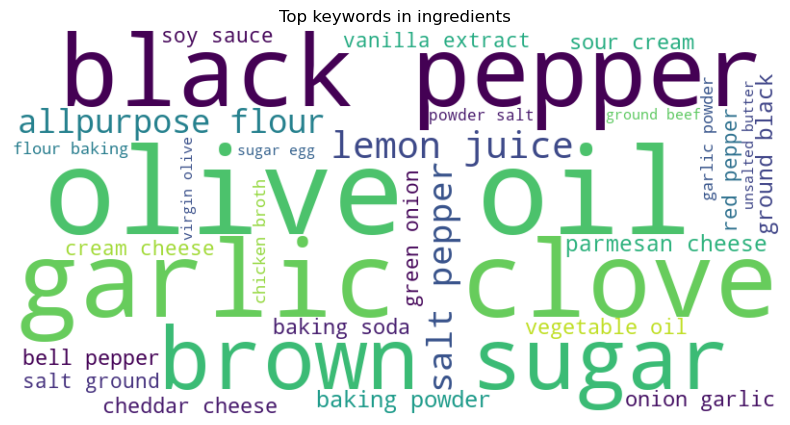

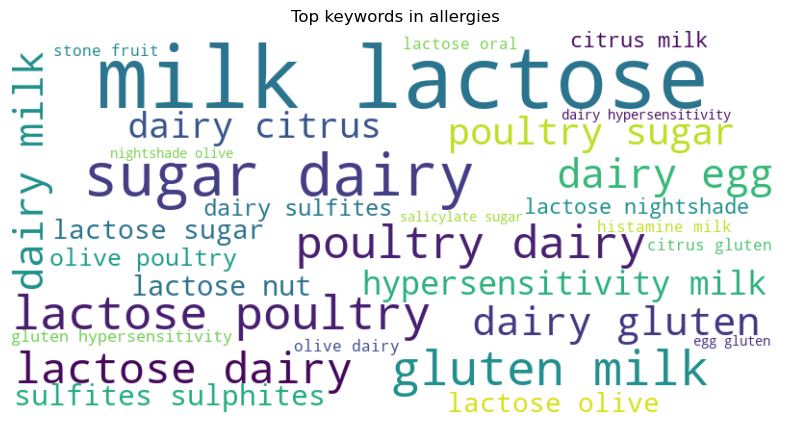

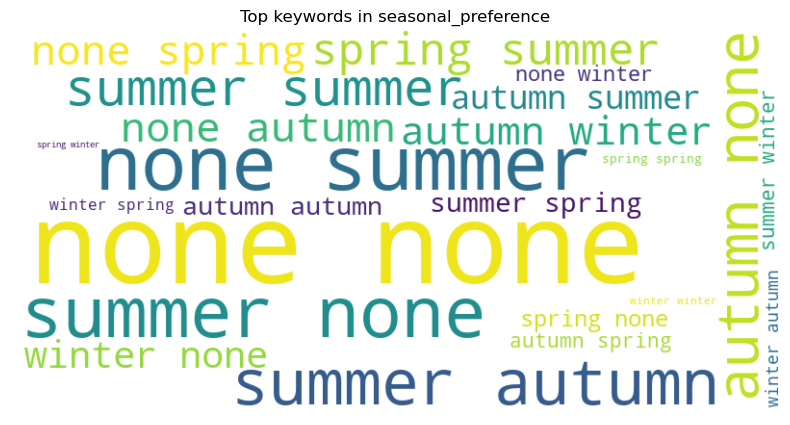

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Columns for word clouds
columns = ['ingredients', 'allergies', 'seasonal_preference']

# Generate word clouds for each column
for col in columns:
    # Concatenate all the texts in the column
    text = ' '.join(data[col].dropna().astype(str).tolist())

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, max_words=30, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top keywords in {col}')
    plt.axis('off')
    plt.show()

### Now the dataset - 'data' is completely ready for the food recommendation model building basis the input data

#### Store the processed and cleaned data in a csv file - 'model_data.csv'

In [ ]:
data.to_csv('model_data.csv', index=False)